In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [475]:
def standardize(x):
    mean = np.mean(x)
    stddev = np.std(x)
    Z = (x-mean)/stddev
    return Z
def normalize(x):
    X_min = np.min(x)
    X_max = np.max(x)
    Z = (x-X_min)/(X_max-X_min)
    return Z
def denormalize(x,Z):
    X_min = np.min(x)
    X_max = np.max(x)
    W = Z*(X_max-X_min)+X_min
    return W
    
def useDat(data):
    I_Df = pd.DataFrame();
    I_Df["YearBuilt"] = data["YearBuilt"]
    I_Df["LotArea"] = data["LotArea"]
    I_Df["LotFrontage"] = np.log(data["LotFrontage"])
    I_Df["BsmtFinSF1"] = data["BsmtFinSF1"];
    I_Df["BsmtFinSF1"] = I_Df["BsmtFinSF1"].replace(0,I_Df["BsmtFinSF1"].mean())
    I_Df["BsmtFinSF1"] = np.log(I_Df["BsmtFinSF1"])
    I_Df["TotalBsmtSF"] = data["TotalBsmtSF"];
    I_Df["TotalBsmtSF"] = I_Df["TotalBsmtSF"].replace(0,I_Df["TotalBsmtSF"].mean())
    I_Df["TotalBsmtSF"] = np.log(I_Df["TotalBsmtSF"])
    I_Df["OverallQual"] = data["OverallQual"]
    I_Df["1stFlrSF"] = np.log(data["1stFlrSF"])
    I_Df["2ndFlrSF"] =data["2ndFlrSF"]
    I_Df["2ndFlrSF"] = I_Df["2ndFlrSF"].replace(0,I_Df["2ndFlrSF"].mean())
    I_Df["GrLivArea"] = data["GrLivArea"]
    I_Df["FullBath"] = data["FullBath"]
    I_Df["FullBath"] = I_Df["FullBath"].replace(0,I_Df["FullBath"].mean())
    I_Df["BedroomAbvGr"] = data["BedroomAbvGr"]
    I_Df["TotRmsAbvGrd"] = data["TotRmsAbvGrd"]
    I_Df["GarageYrBlt"] = data["GarageYrBlt"]
    I_Df["GarageArea"] = data["GarageArea"]
    I_Df["GarageArea"] = I_Df["GarageArea"].replace(0,I_Df["GarageArea"].mean())
    I_Df["GarageArea"] = np.log(I_Df["GarageArea"])
    I_Df["OpenPorchSF"] = data["OpenPorchSF"]
    I_Df["OpenPorchSF"] = I_Df["OpenPorchSF"].replace(0,I_Df["OpenPorchSF"].mean())
    I_Df["OpenPorchSF"] = np.log(I_Df["OpenPorchSF"])
    I_Df = I_Df.fillna(I_Df.mean())
    I_Dfnorm = normalize(I_Df)
    I_Dfnorm["YearBuiltCurvyBOI"] = standardize(I_Dfnorm["YearBuilt"]**2)
    I_Dfnorm["OverallQualCurvyBOI"] = standardize(I_Dfnorm["OverallQual"]**2)
    I_Dfnorm["BsmtFinSF1CurvyBOI"] = standardize(I_Dfnorm["BsmtFinSF1"]**2)
    I_Dfnorm["TotalBsmtSFCurvyBOI"] = standardize(I_Dfnorm["TotalBsmtSF"]**2)
    I_Dfnorm["1stFlrSFCurvyBOI"] = standardize(I_Dfnorm["1stFlrSF"]**2)
    I_Dfnorm["2ndFlrSFCurvyBOI"] = standardize(I_Dfnorm["2ndFlrSF"]**2)
    I_Dfnorm["GrLivAreaCurvyBOI"] = standardize(I_Dfnorm["GrLivArea"]**2)
    I_Dfnorm["BedroomAboveGrCurvyBOI"] = standardize(I_Dfnorm["BedroomAbvGr"]**2)
    I_Dfnorm["GarageYrBltCurvyBOI"] = standardize(I_Dfnorm["GarageYrBlt"]**2)
    I_Dfnorm["GarageAreaCurvyBOI"] = standardize(I_Dfnorm["GarageArea"]**2)
    I_Dfnorm["OpenPorchSFCurvyBOI"] = standardize(I_Dfnorm["OpenPorchSF"]**2)
    I_Dfnorm["y-int"] = 1
    O_Df = data["SalePrice"]
    O_Dfnorm = pd.DataFrame(normalize(O_Df))
    inputs = np.array(I_Dfnorm)
    outputs = np.array(O_Df)
    outputs = outputs.flatten()
    plt.plot(inputs[:,0], outputs, 'k.')
    return [inputs,outputs, I_Df, ]


(0, 0.05)

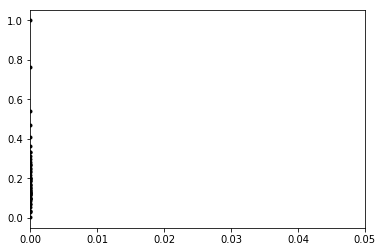

In [476]:
data = pd.read_csv('train.csv',usecols=["LotFrontage","LotArea","OverallQual",
                                        "BsmtFinSF1","TotalBsmtSF","YearBuilt",
                                        "1stFlrSF","2ndFlrSF","GrLivArea",
                                        "FullBath","BedroomAbvGr","TotRmsAbvGrd",
                                        "GarageYrBlt","GarageArea","OpenPorchSF",
                                        "MoSold","SalePrice"])
I_Df = pd.DataFrame();
##I_Df["Foundation"] = I_Df["Foundation"].astype("category").cat.codes
I_Df["MoSold"] = data["MoSold"]
##I_Df["MoSold"] = I_Df["MoSold"].replace(0,I_Df["OpenPorchSF"].mean())
##I_Df["OpenPorchSF"] = np.log(I_Df["OpenPorchSF"])
I_Df = I_Df.fillna(I_Df.mean())
I_Df = normalize(I_Df)
##I_Df["MoSold"] = np.fft.ifft(I_Df["MoSold"])
##I_Df["OpenPorchSFCurvyBOI"] = standardize(I_Df["OpenPorchSF"]**2)
I_Df["y-int"] = 1
O_Df = pd.DataFrame(normalize(data["SalePrice"]))
inputs = np.array(I_Df)
outputs = np.array(O_Df)
outputs = outputs.flatten()
plt.plot(inputs[:,0], outputs, 'k.')
#plt.plot(outputs, inputs[:,0], 'k.')
#ax = plt.gca()
#ax.set_xlim(0,.05)

don't use 
MSZoning
Street
Alley
LandContour
Utilities
LandSlope
Condition1&2
BldgType
Roof Matl
Exterior 2nd
MasVnrType
MasVnrArea
ExterCond
ExterQual
BsmtCond
BsmtExposure
BsmtFinType2
BsmtFinSF2
Heating 
Central Air
Electrical
LowQualfinSF
BsmtHalfBath
KitchenAbvGr
Functional
GarageQual
GarageCond
PavedDrive
EnclosedPorch
3SsnPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
SaleType
YrSold

Use:
MSSubClass
LotFrontage
LotArea
LotShape
LotConfig
Neighborhood
HouseStyle
OverallQual
OverallCond
YearSold-Yearbuilt
YearSold-YearRemoddAdd
Roof Style
Exterior 1st
Foundation




1124477906.57


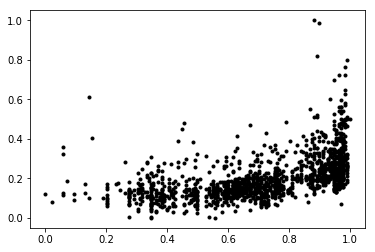

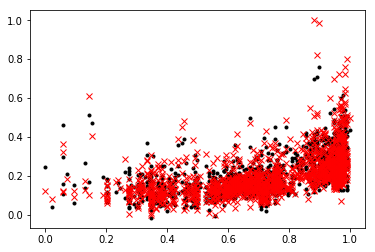

In [477]:
def gradDesc(weights, learningRate, epochs):
    for r in range(epochs):
        hyp = weights.dot(inputs.T)
        loss = hyp-outputs
        gradients = inputs.T.dot(loss) / len(inputs)
        weights = weights-learningRate*gradients
        
    return weights
[inputs, outputs] = useDat(data)
weights = gradDesc(np.array([1] * inputs.shape[1]), .04, 50000)
hyp = weights.dot(inputs.T)
loss = (hyp-outputs)
loss = denormalize(data["SalePrice"], loss)
loss = (loss**2)/len(inputs)
loss_tot = np.sum(loss)/2
print(loss_tot)
plt.figure()
plt.plot(inputs[:,0], hyp, 'k.')
plt.plot(inputs[:,0], outputs, 'rx')